# Linear Regression

- y=a + bx + b1 X1+ b2 X2....
- y=>dependent/target (1) [1D]
- x=>independent/feature (n) [2D]


In [120]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [121]:
#independent
time=np.array([5,7,12,16,20]).reshape(-1,1)

In [122]:
#dependent
mass=np.array([40,120,180,210,240])

In [123]:
mymodel = LinearRegression()
#model.fit(ind,dep)
mymodel.fit(time,mass)

LinearRegression()

In [124]:
x=int(input("Enter the time in minutes:"))
result = mymodel.predict([[x]]) #passing ind var(time in 2D)
print("if the time is",x,"minutes the mass is",result[0],"grams")

Enter the time in minutes: 45


if the time is 45 minutes the mass is 560.8571428571429 grams


In [125]:
mass_model = mymodel.predict(time)
print(mass_model)

[ 72.54545455  96.96103896 158.         206.83116883 255.66233766]


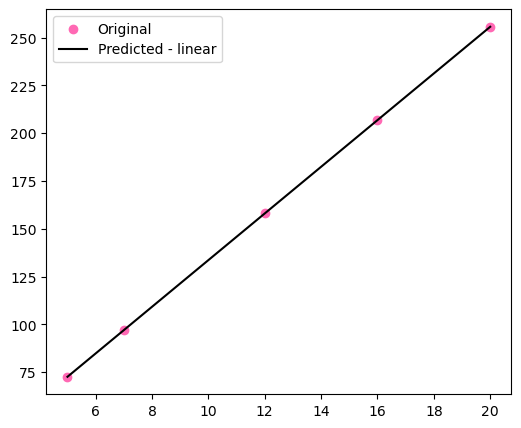

In [126]:
#plotting original values
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(time,mass_model,label="Original",color='hotpink')
#plotting model values - line
plt.plot(time,mass_model,label='Predicted - linear',color='k')
plt.legend()
plt.show()

linear Regression on large data

Evaluation:

R-square
- larger,the better

In [127]:
r2score=r2_score(time,mass_model)
print(r2score)

-816.6925282509699


MSE

In [128]:
mse=mean_squared_error(time,mass_model)
print(mse)

25184.929870129872


MAE

In [129]:
mae=mean_absolute_error(time,mass_model)
print(mae)

146.0


Case: predicting the salary from age,experience,gender,education

- 1.import libraries
- 2.load data
- 3.split data
- 4.create the train model
- 5.test the model
- 6.evaluation

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

loading data

In [131]:
sdf=pd.read_csv("C:\mypythonfiles\Salary_EDA.csv")

In [132]:
sdf.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0


clean Data

In [133]:
sdf.isnull().sum()

Age                    2
Gender                 4
Education Level        3
Job Title              5
Years of Experience    2
Salary                 3
dtype: int64

In [134]:
sdf.dropna(inplace=True)
sdf.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

Data preprocessing

In [135]:
g_e=LabelEncoder()
sdf['gender_encoded']=g_e.fit_transform(sdf['Gender'])
e_f=LabelEncoder()
sdf['Education_L_encoded']=e_f.fit_transform(sdf['Education Level'])
sdf.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,gender_encoded,Education_L_encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0


split - ind,dep

In [136]:
X=sdf[['Age','gender_encoded','Education_L_encoded','Years of Experience']]
Y=sdf['Salary']

split -train and test

In [137]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

create and train

In [138]:
sal_model=LinearRegression()
sal_model.fit(X_train,Y_train)

LinearRegression()

test

In [139]:
a=float(input("Enter your age:"))
g_user=input("Enter your Gender:")
ed_user=input("Enter your Education level:")
exp=float(input("Enter your year of Experience:"))

Enter your age: 34
Enter your Gender: Male
Enter your Education level: PhD
Enter your year of Experience: 4


In [150]:
gen_enc=g_e.transform([g_user])[0]
edu_enc=e_f.transform([ed_user])[0]
print(gen_enc,edu_enc)

1 2


In [141]:
result=sal_model.predict([[a,gen_enc,edu_enc,exp]])
print("the predict salary is : ",result[0])

the predict salary is :  94747.06303601456


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Evaluation:
- Predict test values
- visualize
- metrics

In [142]:
model_predictions=sal_model.predict(X_test)

In [143]:
len(Y_test)

74

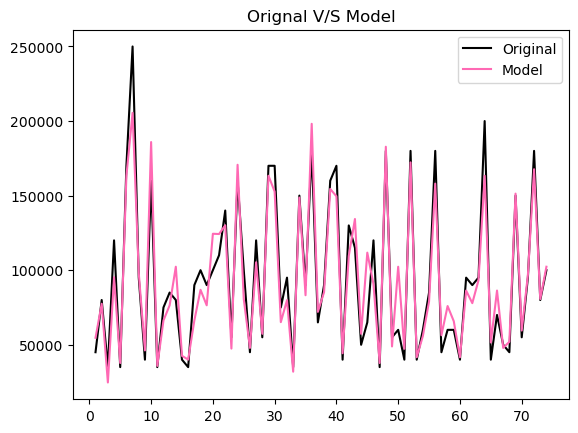

In [144]:
plt.plot(np.arange(1,75),Y_test,color='k',label="Original")
plt.plot(np.arange(1,75),model_predictions,color='hotpink',label="Model")
plt.title('Orignal V/S Model')
plt.legend()
plt.show()


Evalution

In [146]:
r2score=r2_score(Y_test,model_predictions)
print(r2score)
if r2score>0.5:
    print("Model is Good fit")
else:
    print("Model is not Good fit")

0.908465830252362
Model is Good fit


In [147]:
mse=mean_squared_error(Y_test,model_predictions)
print(mse)

235720545.72027326


In [149]:
mae=mean_absolute_error(Y_test,model_predictions)
print(mae)

11362.212304880708
